In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Exploratory Data Analysis(EDA)

In [3]:
#dimensions
print('No. of Rows:', df.shape[0])
print('No. of Columns:', df.shape[1])

No. of Rows: 7043
No. of Columns: 21


In [4]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [6]:
#checking types of columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

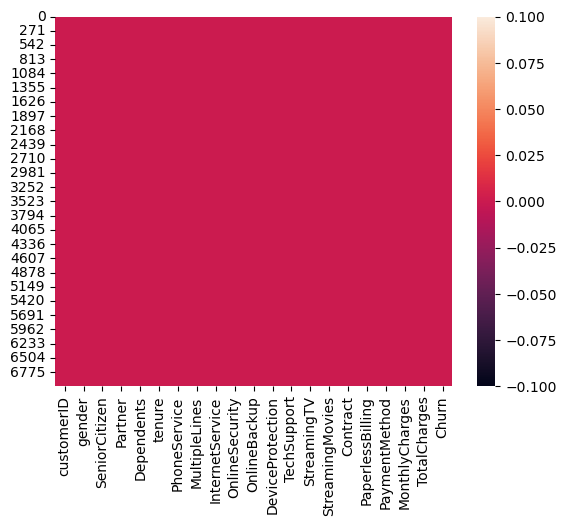

In [8]:

sns.heatmap(df.isnull())

In [9]:

#display overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
df['TotalCharges'].nunique()

6531

In [12]:
#checking the unique value of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

In [13]:
#checking spaces in total charges columns
df.loc[df['TotalCharges']== ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [15]:
#converting object datatype to float datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [16]:
#check null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
#mean and median for continuous value (relationship in features), mode for categori
np.mean(df['TotalCharges'])


2283.3004408418697

In [18]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [19]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [20]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
#seperating numerical and categorical features
categorial_col = []
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorial_col.append(i)

for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)

In [23]:
categorial_col

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [24]:

numerical_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [25]:
df.drop("customerID",axis = 1,inplace=True)

In [26]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [28]:
#display statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Data Visualization

Univariate Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


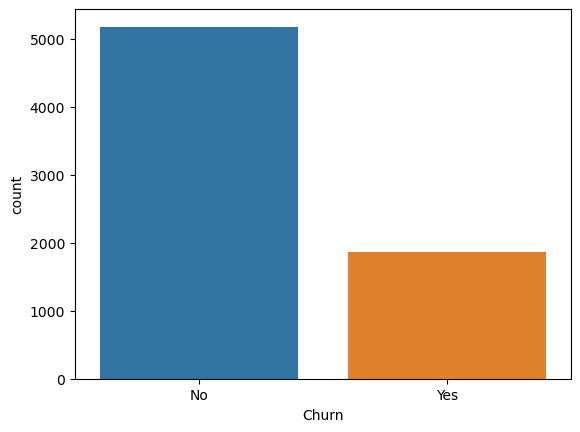

In [29]:
#visualize number of churned customers
ax = sns.countplot(x='Churn',data = df)
print(df['Churn'].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


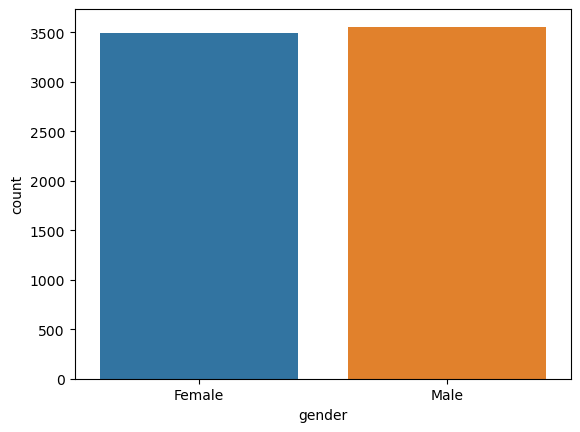

In [30]:
#visualize the count of gender
print(df['gender'].value_counts())
ax = sns.countplot(x='gender',data = df)
plt.show()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


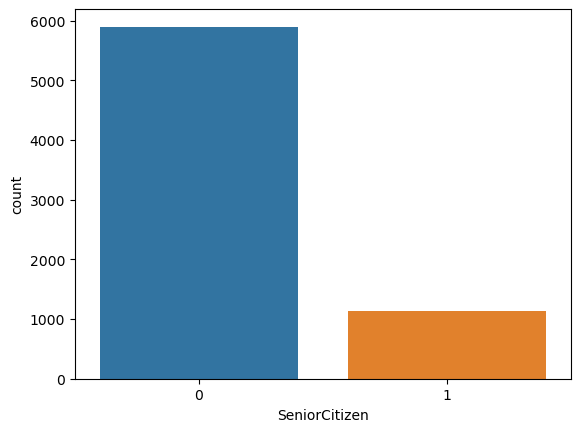

In [31]:
#visualize the count of senior citizen
print(df['SeniorCitizen'].value_counts())
ax = sns.countplot(x='SeniorCitizen',data = df)
plt.show()

No     3641
Yes    3402
Name: Partner, dtype: int64


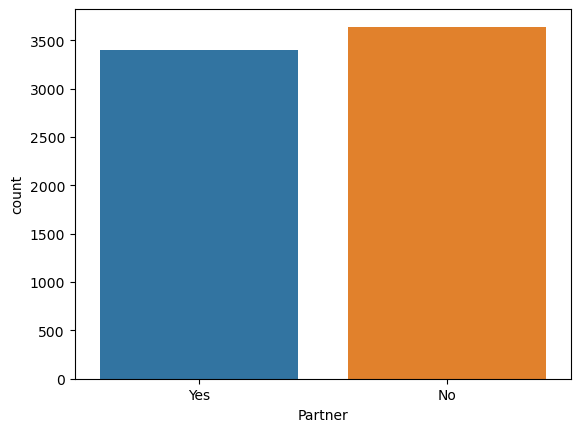

In [32]:
#visualize the count of partner
print(df['Partner'].value_counts())
ax = sns.countplot(x='Partner',data = df)
plt.show()

No     4933
Yes    2110
Name: Dependents, dtype: int64


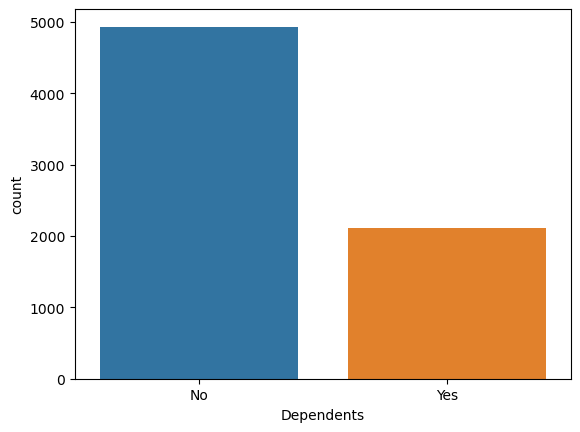

In [33]:
#visualize the count of dependents
print(df['Dependents'].value_counts())
ax = sns.countplot(x='Dependents',data = df)
plt.show()

Yes    6361
No      682
Name: PhoneService, dtype: int64


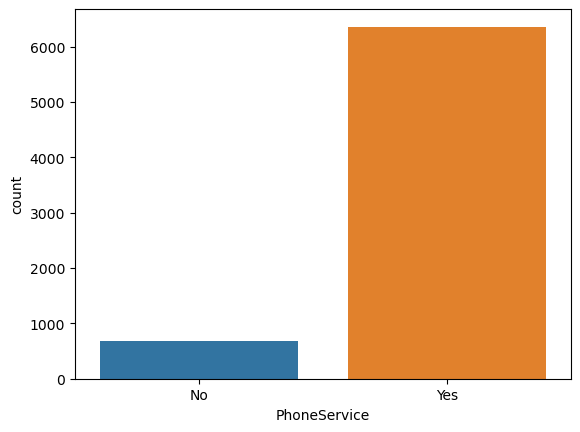

In [34]:
#visualize the count of phone services
print(df['PhoneService'].value_counts())
ax = sns.countplot(x='PhoneService',data = df)
plt.show()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


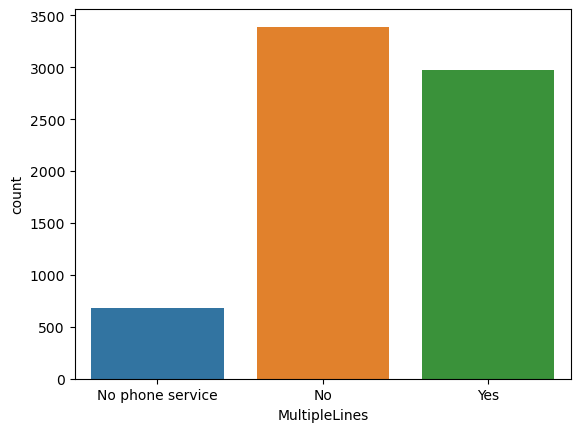

In [35]:
#visualize the count of Multiplelines
print(df['MultipleLines'].value_counts())
ax = sns.countplot(x='MultipleLines',data = df)
plt.show()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


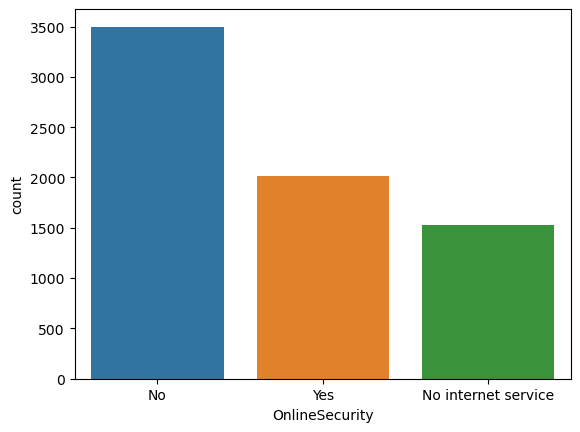

In [36]:
#visualize the count of OnlineSecurity
print(df['OnlineSecurity'].value_counts())
ax = sns.countplot(x='OnlineSecurity',data = df)
plt.show()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


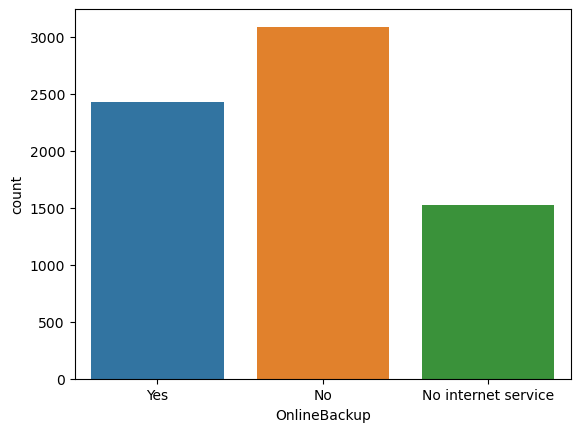

In [37]:
#visualize the count of OnlineBackup
print(df['OnlineBackup'].value_counts())
ax = sns.countplot(x='OnlineBackup',data = df)
plt.show()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


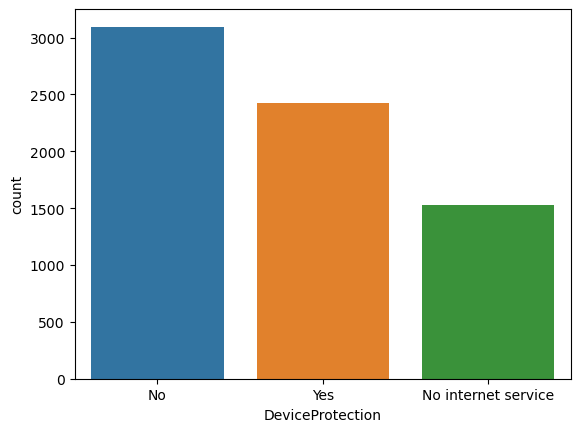

In [38]:
#visualize the count of DeviceProtection
print(df['DeviceProtection'].value_counts())
ax = sns.countplot(x='DeviceProtection',data = df)
plt.show()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


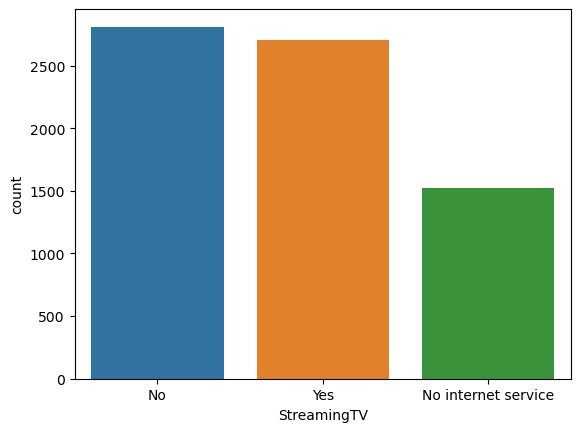

In [39]:
#visualize the count of StreamingTV
print(df['StreamingTV'].value_counts())
ax = sns.countplot(x='StreamingTV',data = df)
plt.show()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


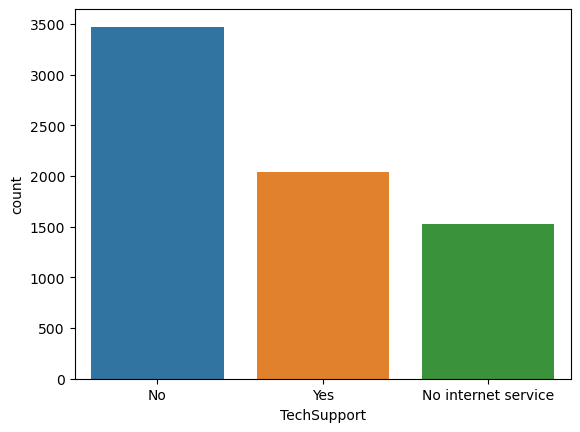

In [40]:
#visualize the count of TechSupport
print(df['TechSupport'].value_counts())
ax = sns.countplot(x='TechSupport',data = df)
plt.show()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


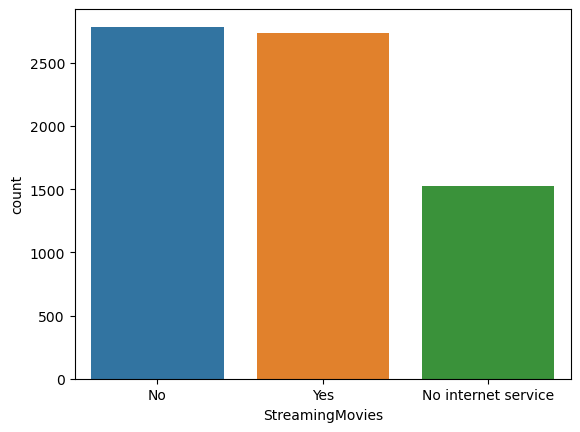

In [41]:
#visualize the count of StreamingMovies
print(df['StreamingMovies'].value_counts())
ax = sns.countplot(x='StreamingMovies',data = df)
plt.show()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


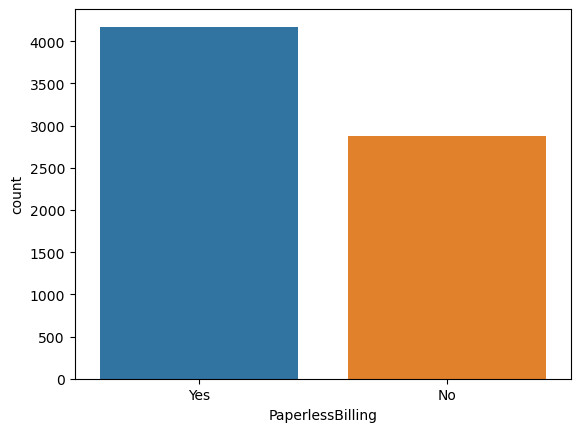

In [42]:
#visualize the count of PaperlessBilling
print(df['PaperlessBilling'].value_counts())
ax = sns.countplot(x='PaperlessBilling',data = df)
plt.show()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


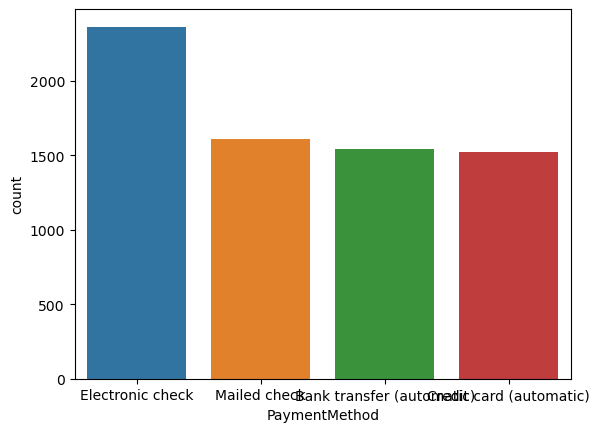

In [43]:
#visualize the count of PaymentMethod
print(df['PaymentMethod'].value_counts())
ax = sns.countplot(x='PaymentMethod',data = df)
plt.show()

#class imbalance problem occurs only in classification problem

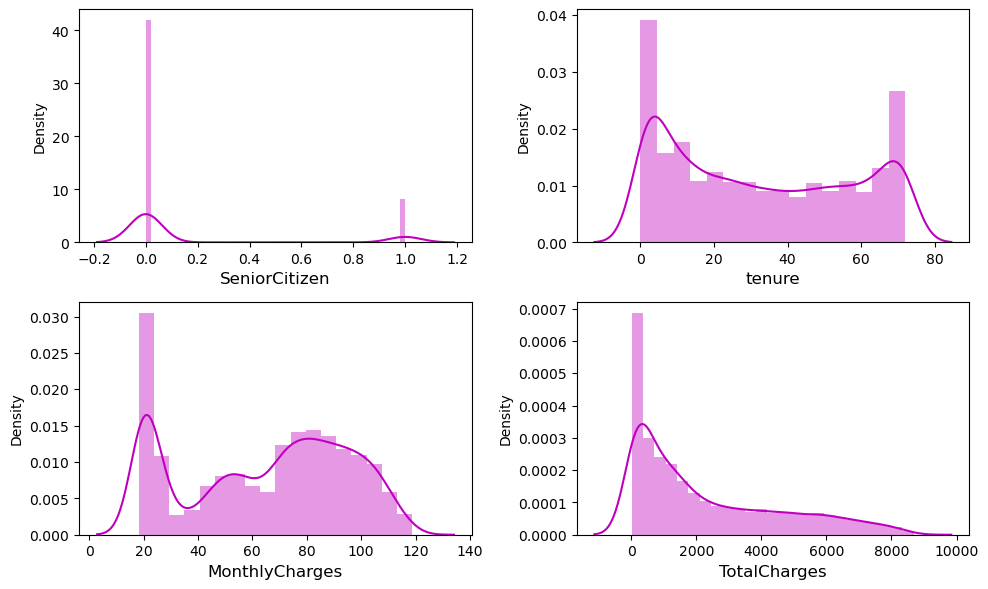

In [44]:
plt.figure(figsize = (10,6),facecolor = 'white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color = 'm')
        plt.xlabel(col,fontsize =12)
        plt.yticks(rotation = 0,fontsize =10)
        plotnumber+=1
plt.tight_layout()  

#data remains normall in all column except in senior citizen. data in total charges is skewed right.

Bivariate Analysis

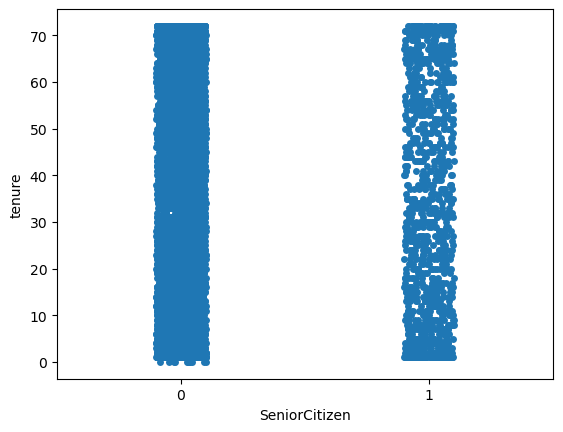

In [45]:
sns.stripplot(x='SeniorCitizen',y='tenure',data =df)
plt.show()

#both the features are of equal length hence no significance

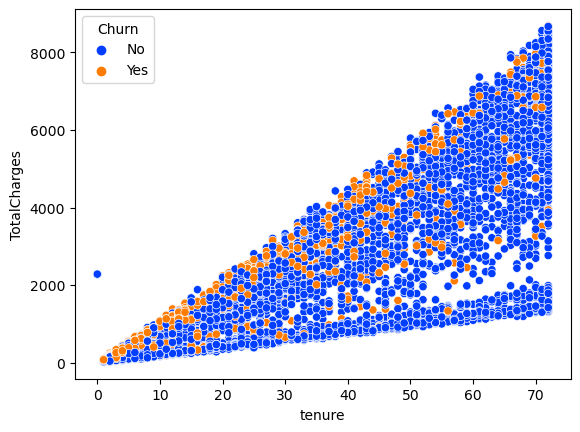

In [46]:
sns.scatterplot(x='tenure',y='TotalCharges',data = df, hue='Churn',palette = 'bright')
plt.show()

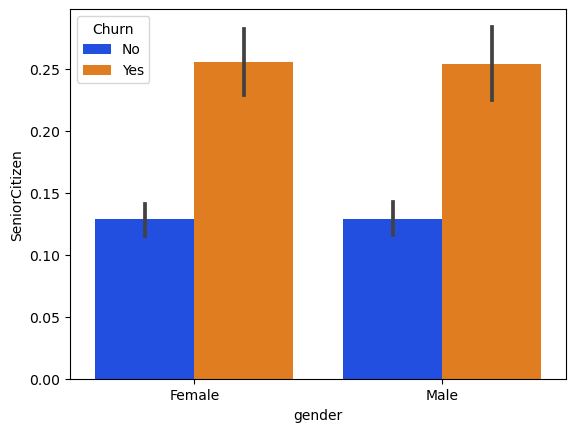

In [47]:
sns.barplot(x='gender',y='SeniorCitizen',data = df, hue='Churn',palette = 'bright')
plt.show()

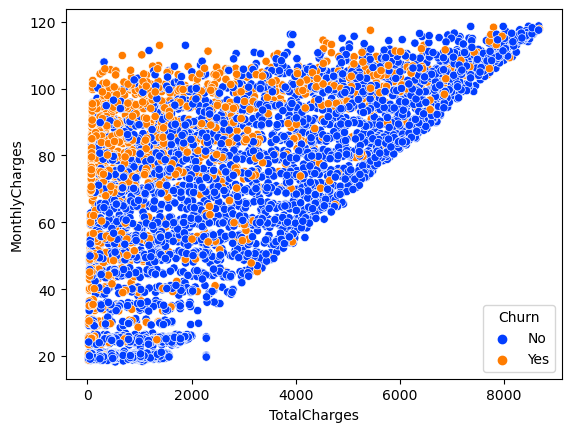

In [48]:
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',data = df, hue='Churn',palette = 'bright')
plt.show()

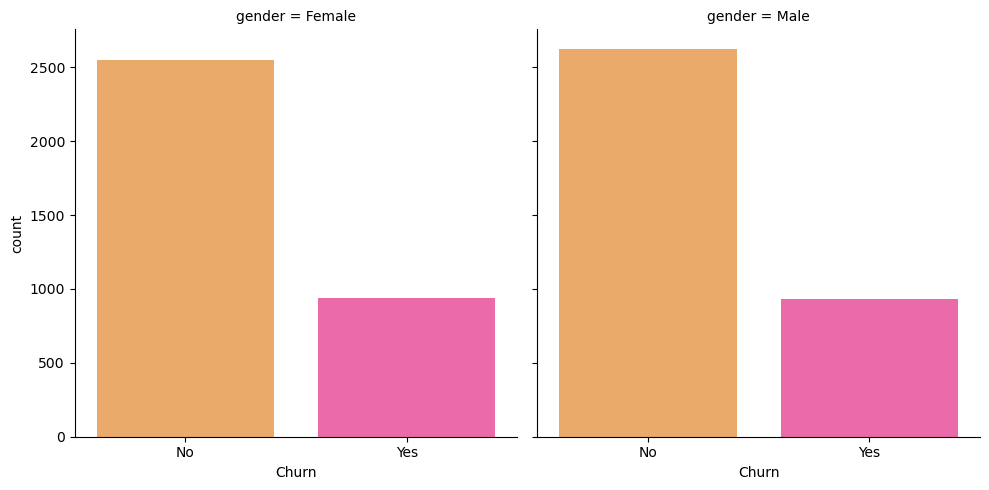

In [49]:
sns.catplot(x='Churn',col='gender',data=df,kind= 'count',palette = 'spring_r')

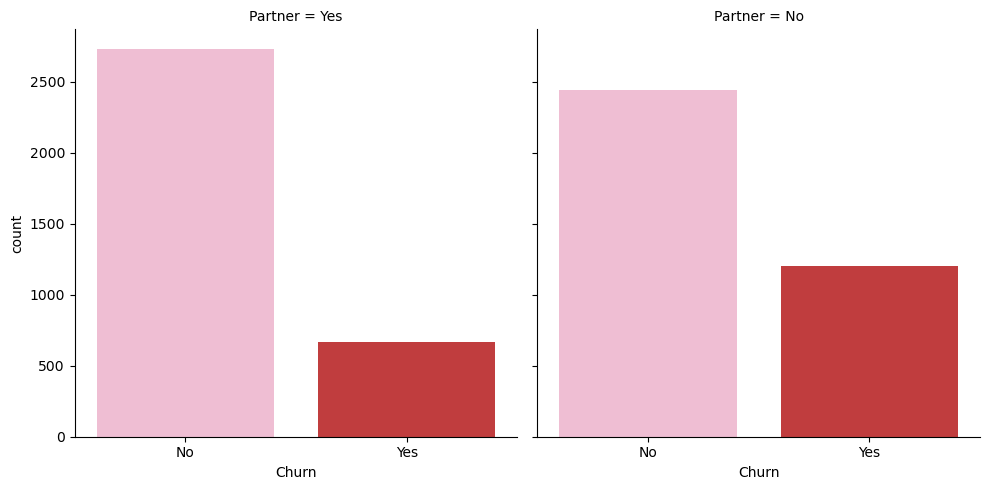

In [50]:
sns.catplot(x='Churn',col='Partner',data=df,kind= 'count',palette = 'tab20_r')

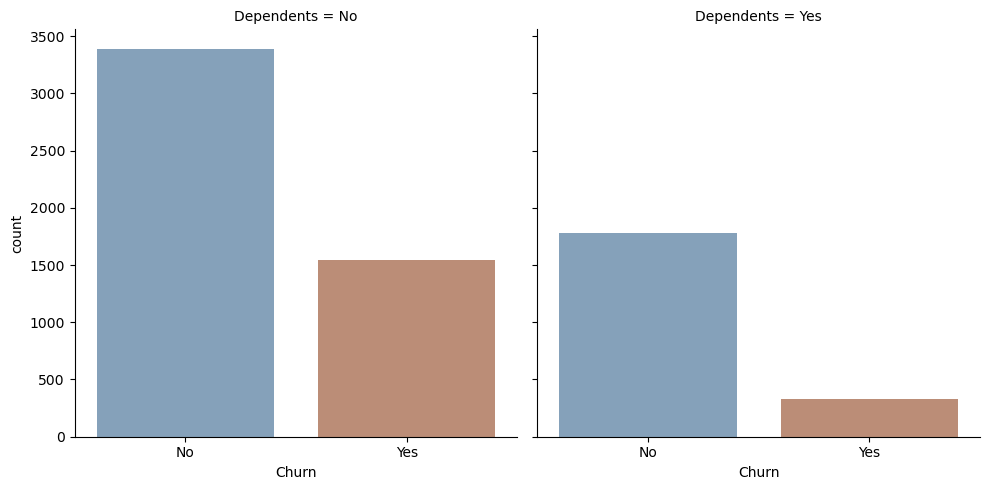

In [51]:
sns.catplot(x='Churn',col='Dependents',data=df,kind= 'count',palette = 'twilight_shifted')

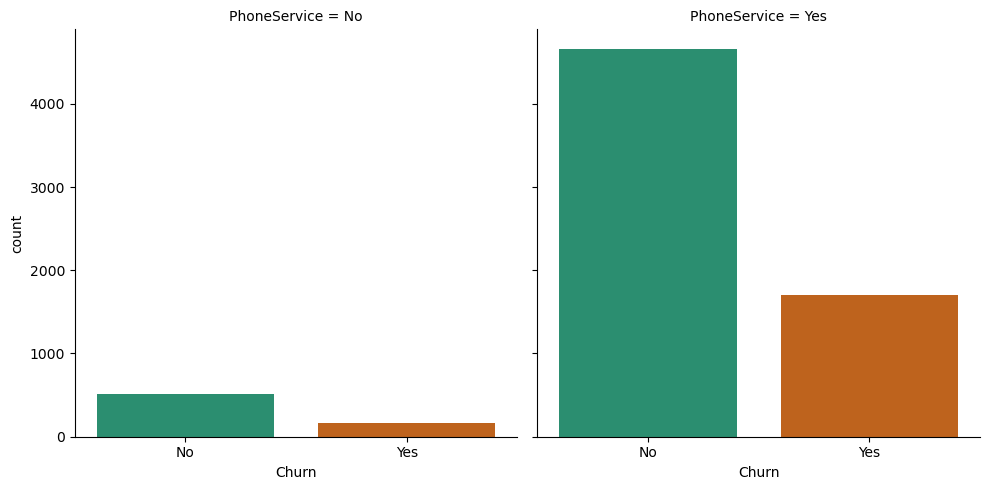

In [52]:
sns.catplot(x='Churn',col='PhoneService',data=df,kind= 'count',palette = 'Dark2')

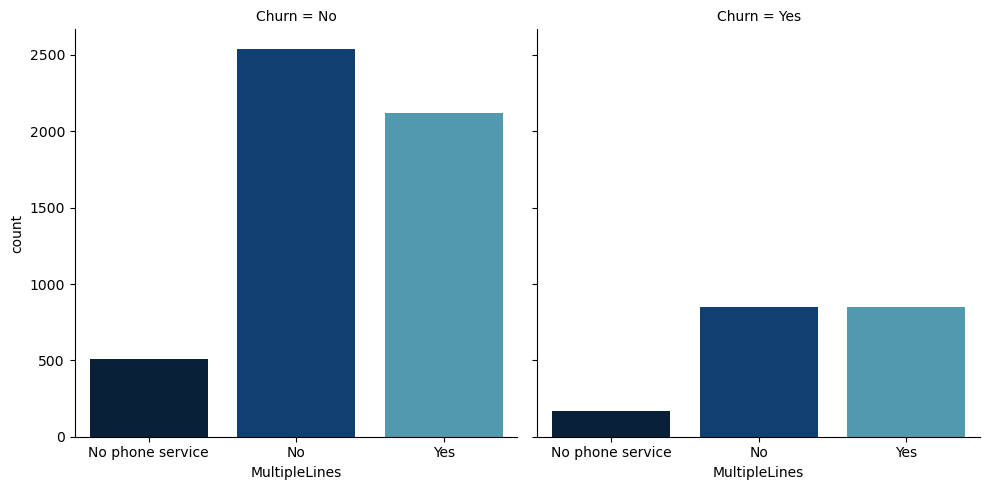

In [53]:
sns.catplot(x='MultipleLines',col='Churn',data=df,kind= 'count',palette = 'ocean')

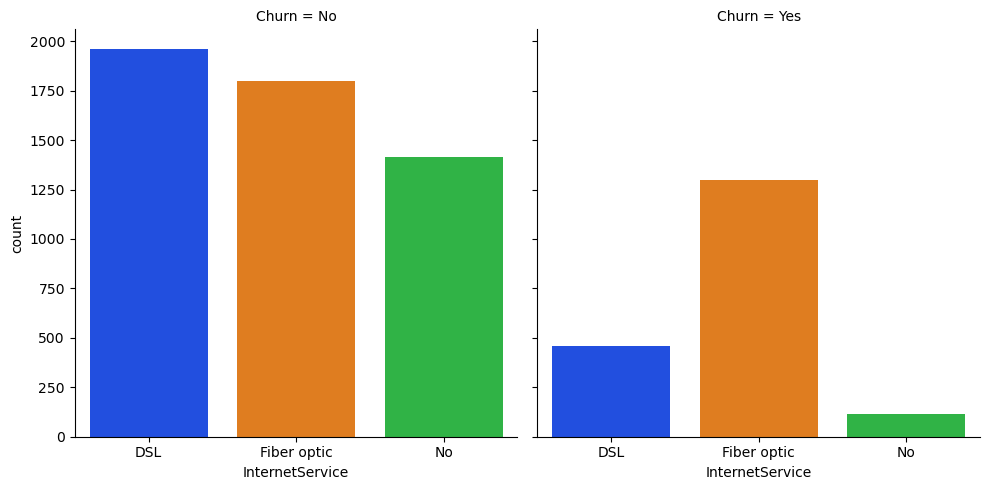

In [54]:
sns.catplot(x='InternetService',col='Churn',data=df,kind= 'count',palette = 'bright')

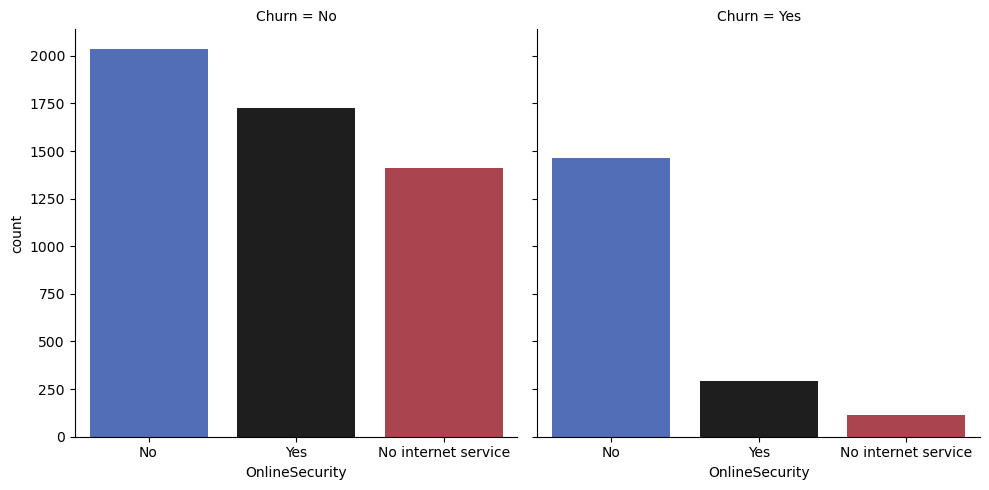

In [55]:
sns.catplot(x='OnlineSecurity',col='Churn',data=df,kind= 'count',palette = 'icefire')

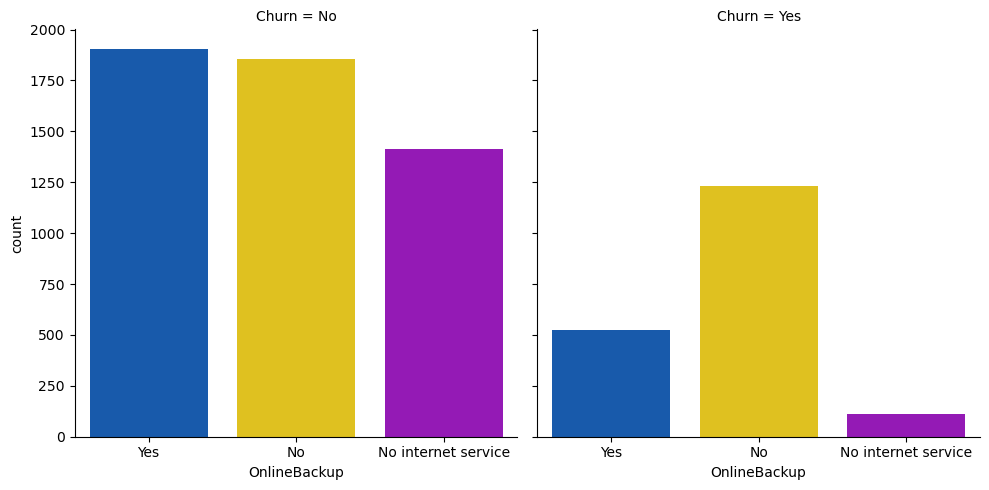

In [56]:
sns.catplot(x='OnlineBackup',col='Churn',data=df,kind= 'count',palette = 'prism')

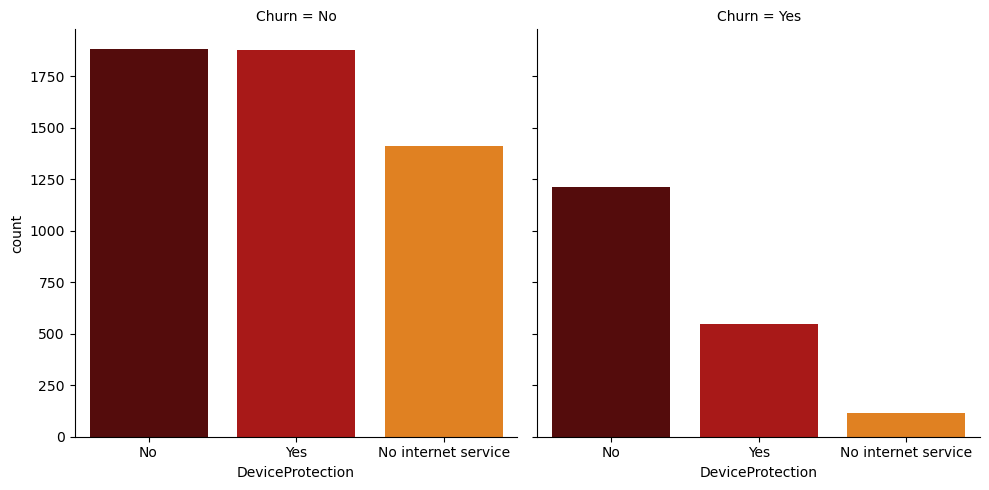

In [57]:
sns.catplot(x='DeviceProtection',col='Churn',data=df,kind= 'count',palette = 'gist_heat')

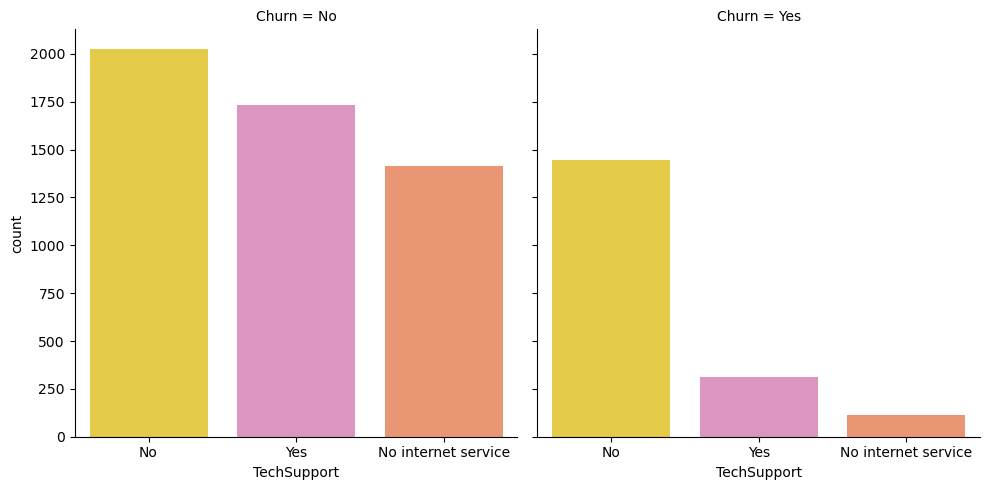

In [58]:
sns.catplot(x='TechSupport',col='Churn',data=df,kind= 'count',palette = 'Set2_r')

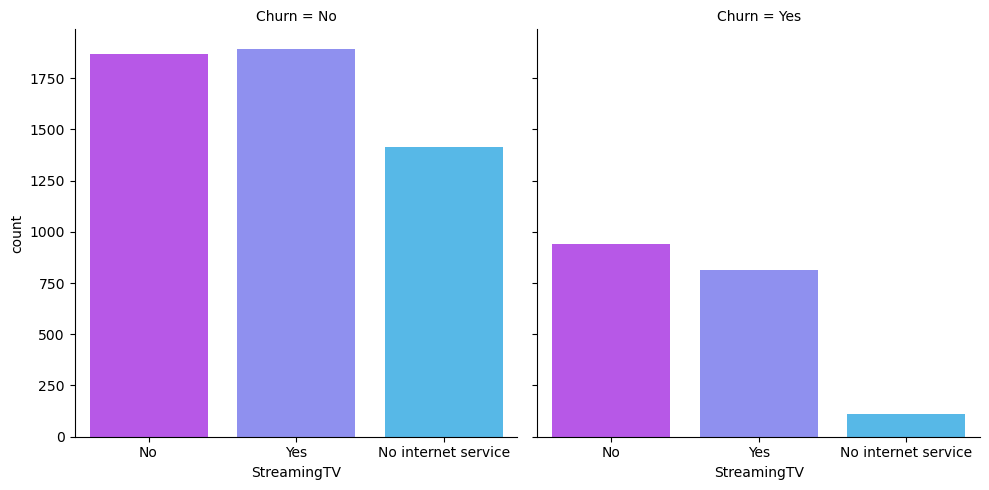

In [59]:
sns.catplot(x='StreamingTV',col='Churn',data=df,kind= 'count',palette = 'cool_r')

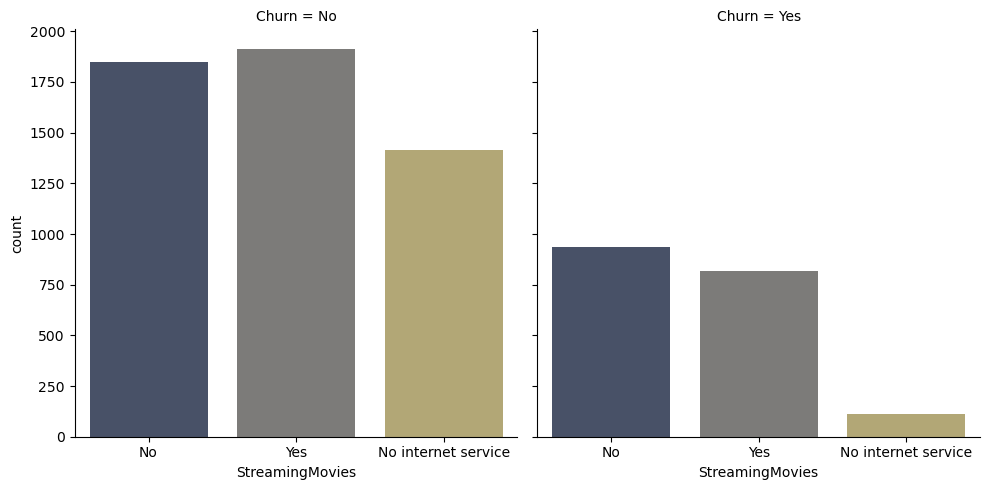

In [60]:
sns.catplot(x='StreamingMovies',col='Churn',data=df,kind= 'count',palette = 'cividis')

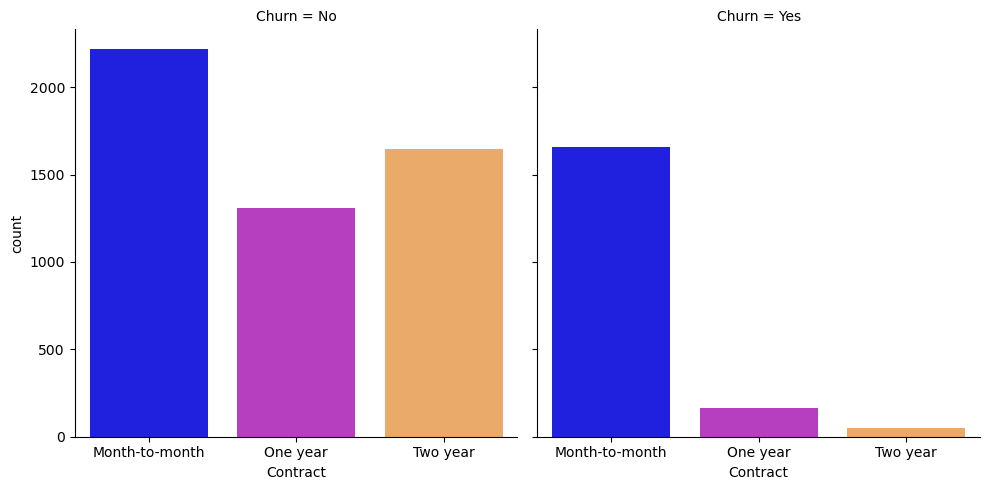

In [61]:
sns.catplot(x='Contract',col='Churn',data=df,kind= 'count',palette = 'gnuplot2')

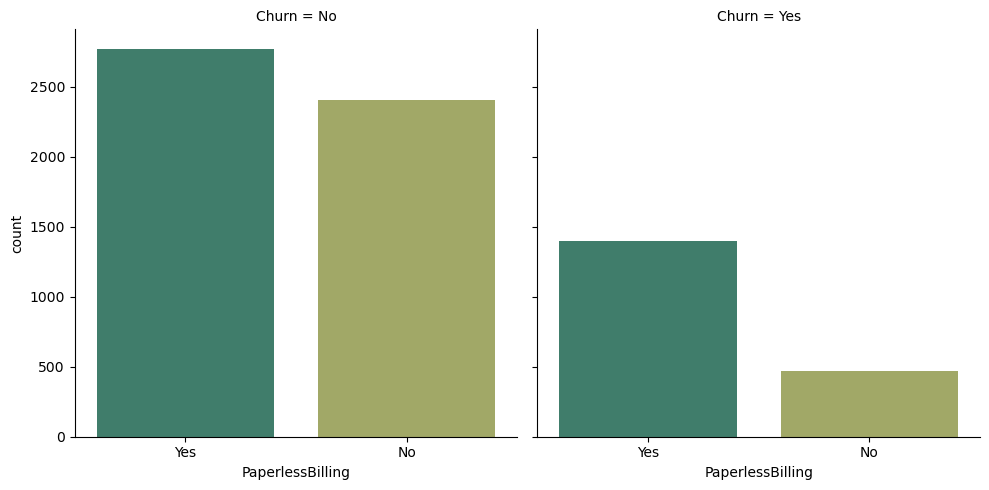

In [62]:
sns.catplot(x='PaperlessBilling',col='Churn',data=df,kind= 'count',palette = 'gist_earth')

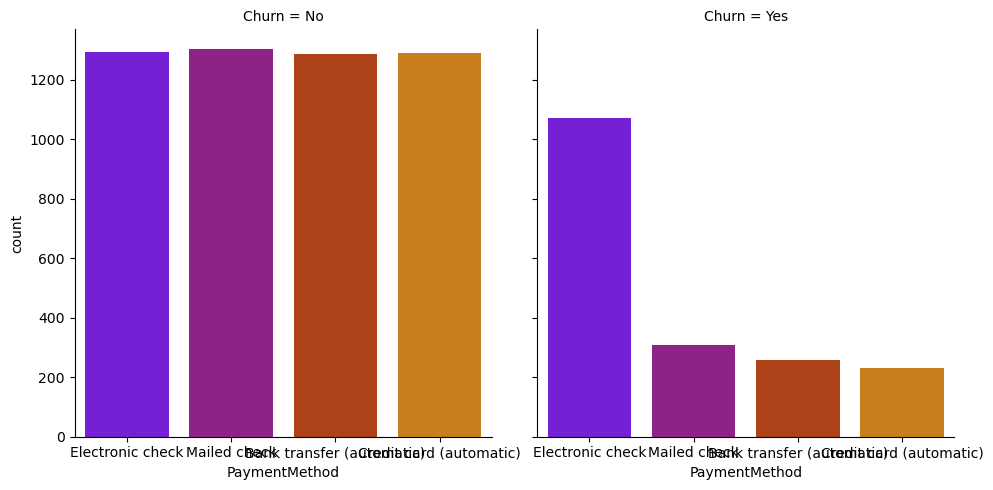

In [63]:
sns.catplot(x='PaymentMethod',col='Churn',data=df,kind= 'count',palette = 'gnuplot')

Multivariate Analysis

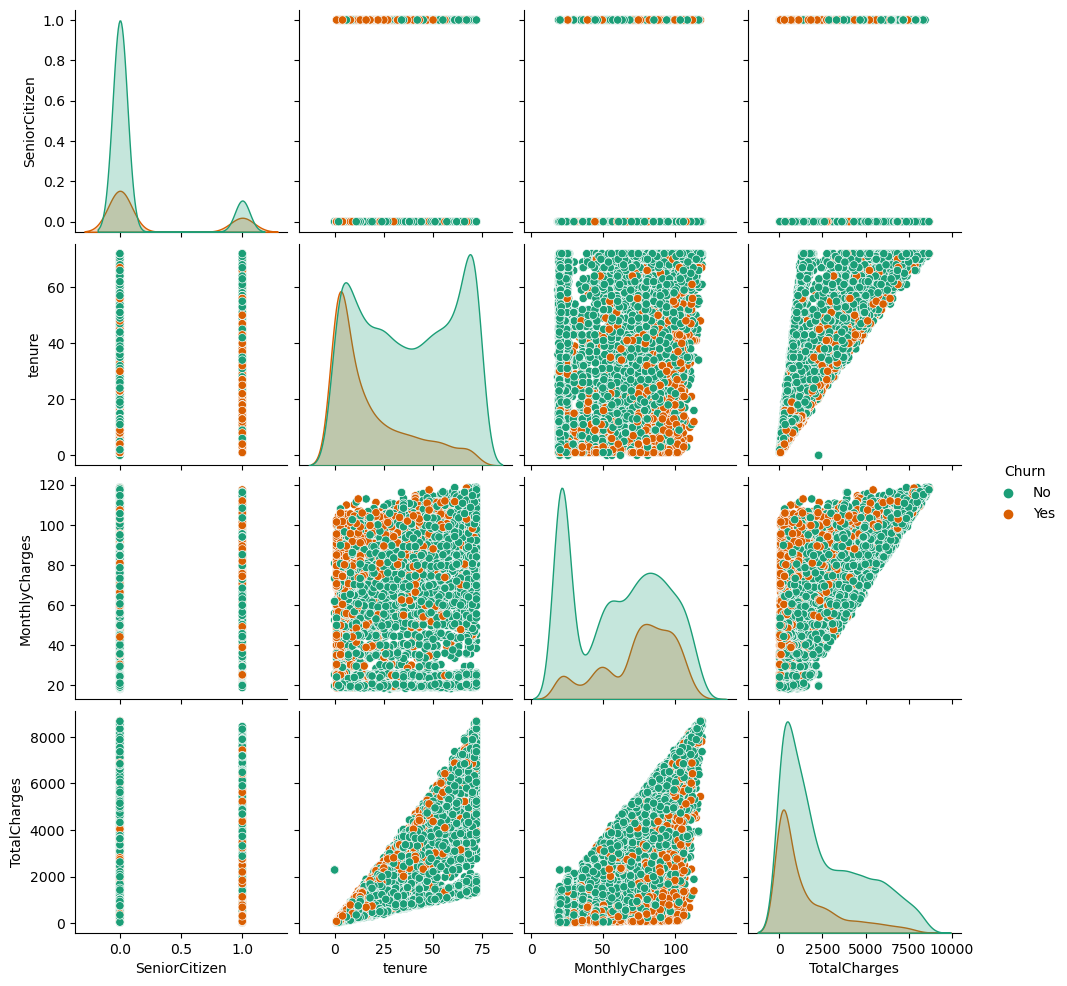

In [64]:
sns.pairplot(df,hue = 'Churn', palette = 'Dark2')
plt.show()

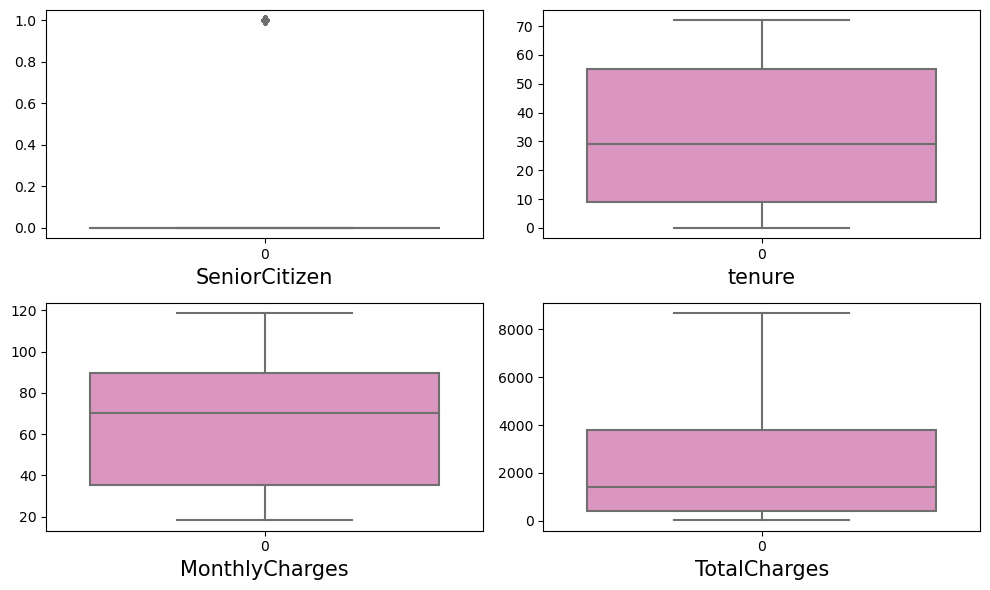

In [65]:
#checking the outliers
plt.figure(figsize = (10,6),facecolor = 'white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette = 'Set2_r')
        plt.xlabel(col,fontsize =15)
        plt.yticks(rotation = 0,fontsize =10)
        plotnumber+=1
plt.tight_layout()  

In [66]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

#do not remove skewness for categorical col and target col

In [67]:
#removing skewness using cube root method as total charges col is continuous col
df['TotalCharges'] = np.cbrt(df['TotalCharges'])

In [68]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

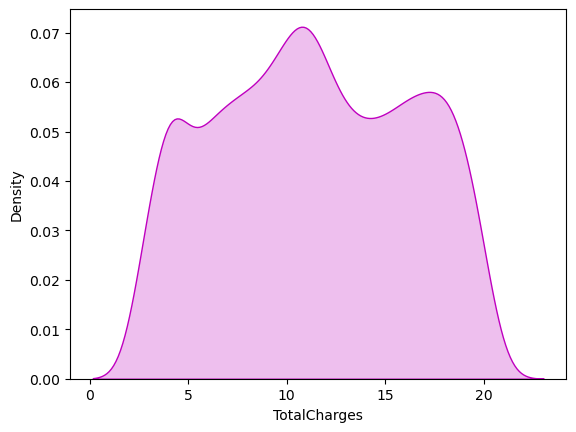

In [69]:
sns.distplot(df['TotalCharges'], color = 'm', kde_kws = {"shade":True}, hist = False)
plt.show()

#skewness reduced in total charges column

Encoding Categorical columns

In [70]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder 
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [72]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


In [73]:
#chech the correlation between features and target.
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


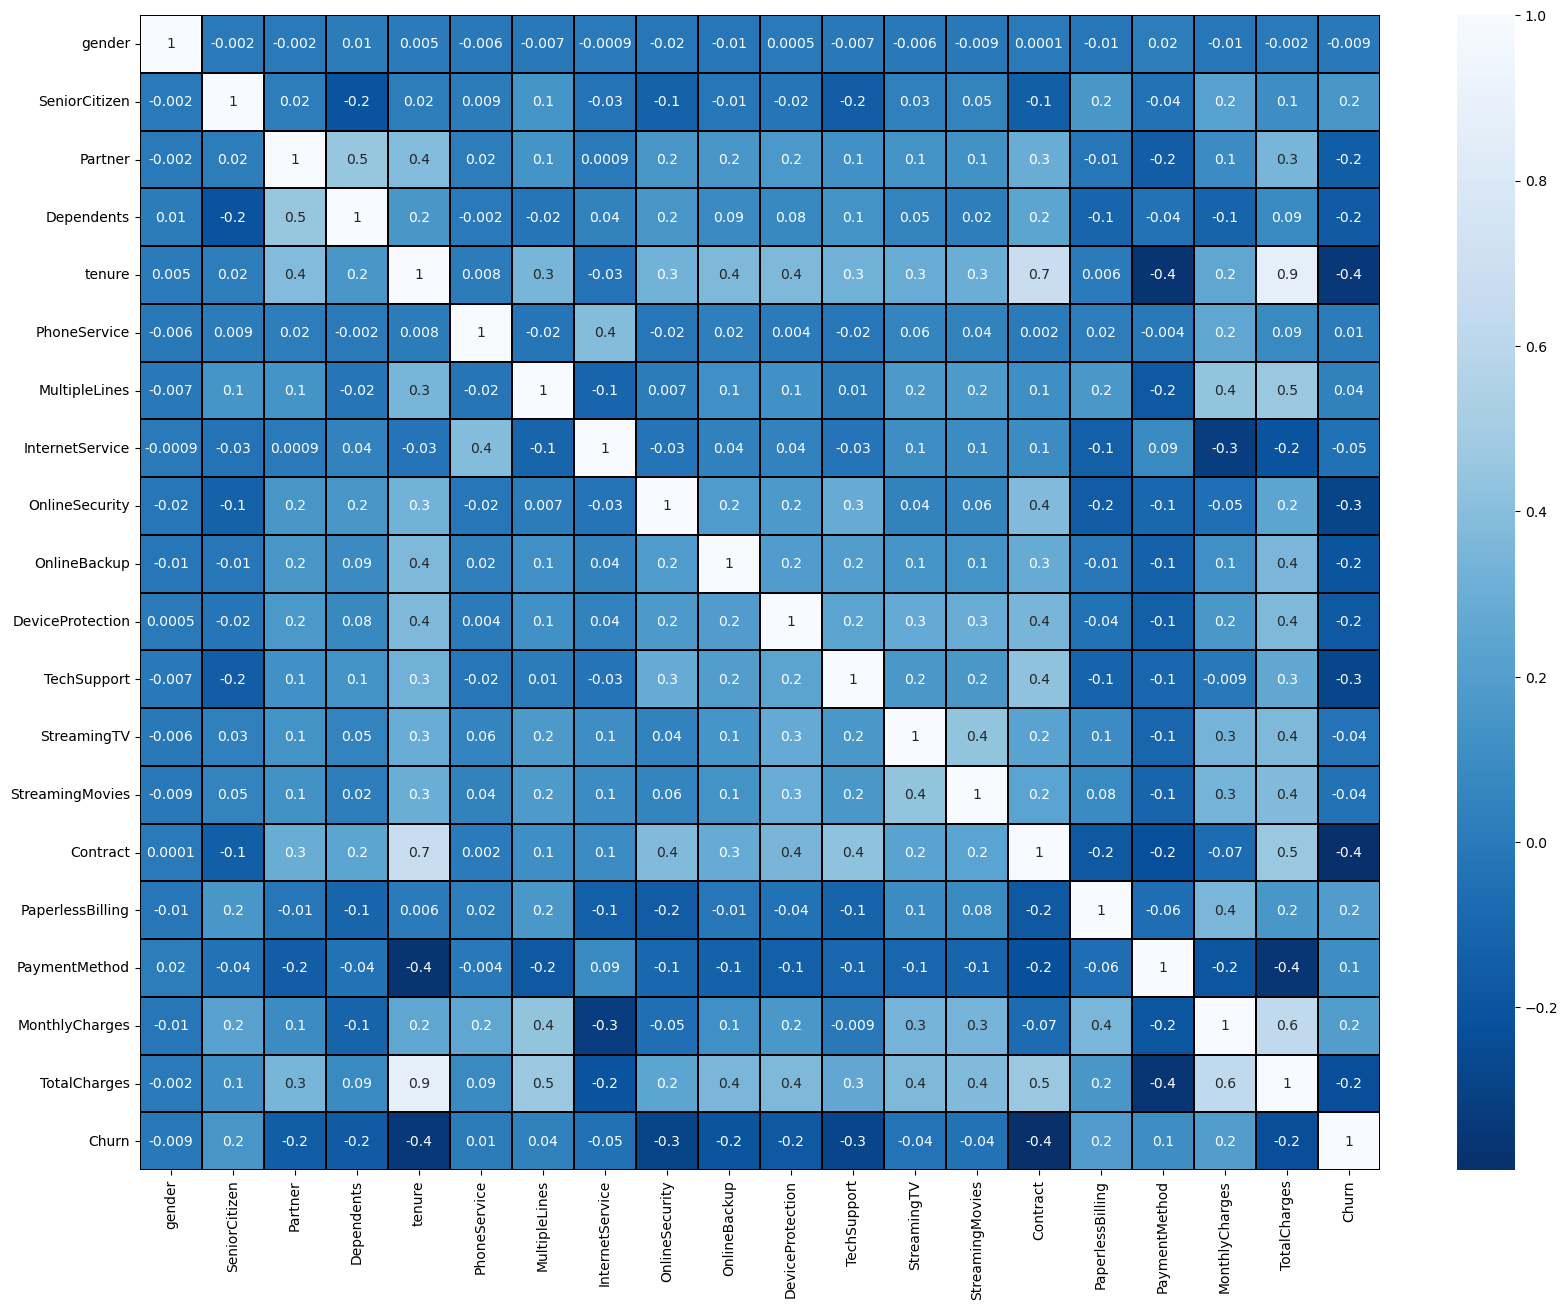

In [74]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g",linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

#indicates 0 - no corelation , -0.3 to +0.3 less correlation, greater than -0.5 or +0.5 moderate corelation , greater than -0.7 or +0.7  is high corelation

In [75]:
cor['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

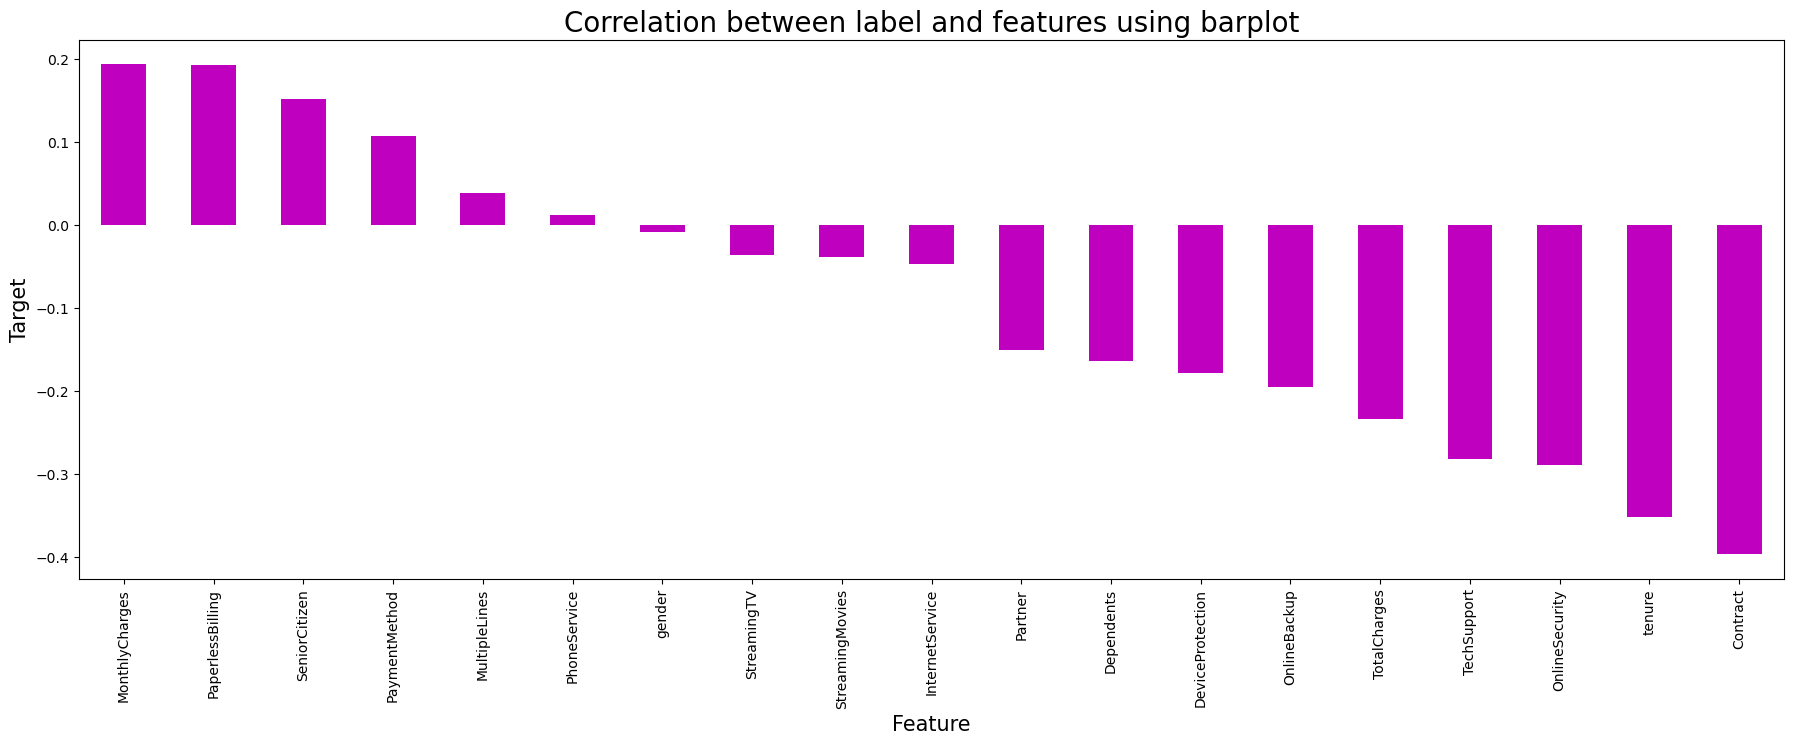

In [76]:
plt.figure(figsize = (22,7))
df.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

#From the above bar plot we can notice the positive and negative correlation between the features and the target. here the features- the gender and the phoneservice have very less correlation with th column.

In [77]:
#Seperating features and label
x = df.drop("Churn",axis = 1)
y = df["Churn"]

In [78]:
#Feature Scaling using Standard Scalarization to overcome the issue of biasness
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


In [79]:
#checking variance inflation factor(VIF) to reduce multicollinearity
#finding varience inflation factor in each scaled column i.e x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


#By checking Vif values we can find the features causig multicollinearity problem. If VIF value is 1 that means that col is not related with other remaining independent col/variables.Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have correlation with other features.We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [80]:
#dropping the totalcharges column
x.drop("TotalCharges",axis = 1,inplace = True)

In [81]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338


In [82]:
#checking variance inflation factor(VIF)
#finding varience inflation factor in each scaled column i.e x.shape[1] (1/(1-R2))
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


In [83]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

#here the data is not balanced,since it is a classification problem we balance the data using oversampling method.(This method not used for regression model)

In [84]:
#Oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

#smote method is applied over entire data (i.e on features and target variable)not just on train or test data

In [85]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [86]:
y1.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

# Modelling

In [110]:
#Finding the best random state 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  0.8650563607085346 at random_state 64


Creating train test split

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.30, random_state = maxRS)

Classification Algorithm 

In [112]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [113]:
#checking accuracy for random forest classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7823000473260767
[[1395  176]
 [ 284  258]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1571
         1.0       0.59      0.48      0.53       542

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [114]:
##checking accuracy for Logistic Regression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7979176526265973
[[1401  170]
 [ 257  285]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1571
         1.0       0.63      0.53      0.57       542

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [115]:
#checking accuracy for support vector classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8007572172266919
[[1424  147]
 [ 274  268]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1571
         1.0       0.65      0.49      0.56       542

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [116]:
#checking accuracy for Gradient Boosting classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7969711310932324
[[1397  174]
 [ 255  287]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1571
         1.0       0.62      0.53      0.57       542

    accuracy                           0.80      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [117]:
#checking accuracy for AdaBoost classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.7993374349266446
[[1397  174]
 [ 250  292]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1571
         1.0       0.63      0.54      0.58       542

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [118]:
#checking accuracy for Baggingclassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.7789872219592996
[[1390  181]
 [ 286  256]]
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1571
         1.0       0.59      0.47      0.52       542

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [119]:
#checking accuracy for Extra Trees classifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7714150496923805
[[1382  189]
 [ 294  248]]
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      1571
         1.0       0.57      0.46      0.51       542

    accuracy                           0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



In [120]:
all_data = pd.DataFrame({'Model':['RFC','LR','SVC','GB','ABC','BC','ET'],
                    'ACC':[accuracy_score(y_test,predRFC)*100,
                           accuracy_score(y_test,predLR)*100,
                          accuracy_score(y_test,predsvc)*100,
                          accuracy_score(y_test,predGB)*100,
                          accuracy_score(y_test,predABC)*100,
                          accuracy_score(y_test,predBC)*100,
                          accuracy_score(y_test,predET)*100]})

In [121]:
all_data

,Model,ACC
0,RFC,78.230005
1,LR,79.791765
2,SVC,80.075722
3,GB,79.697113
4,ABC,79.933743
5,BC,77.898722
6,ET,77.141505


Cross Validation Score - to avoid overfitting and underfitting problem.

In [122]:
from sklearn.model_selection import cross_val_score

#cross_val_score(modelname,features,targetvariable, cv=foldvalue, scoring = 'accuracy')
#by deafult cv=5,
#for classification - accuracy
 for regression = r2 score

In [123]:
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)-score.mean())

[0.7920511  0.7920511  0.77004968 0.79758523 0.79403409]
0.7891542397896639
Difference between accuracy score and cross validation score is -  -0.006854192463587205


In [124]:
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predsvc)-score.mean())

[0.79914833 0.80411639 0.78424414 0.79971591 0.80113636]
0.7976722288534744
Difference between accuracy score and cross validation score is -  0.0030849883732174677


In [125]:
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predGB)-score.mean())

[0.81476224 0.8012775  0.78495387 0.80397727 0.80752841]
0.802499858861862
Difference between accuracy score and cross validation score is -  -0.005528727768629671


In [126]:
score = cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predABC)-score.mean())

[0.81121363 0.80482612 0.79914833 0.80539773 0.80752841]
0.8056228426027486
Difference between accuracy score and cross validation score is -  -0.006285407676104082


In [127]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predLR)-score.mean())

[0.80553584 0.81547197 0.78708304 0.80539773 0.80610795]
0.8039193052777598
Difference between accuracy score and cross validation score is -  -0.006001652651162481


In [128]:
score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predBC)-score.mean())

[0.78424414 0.78069553 0.75940383 0.77414773 0.78125   ]
0.775948246661075
Difference between accuracy score and cross validation score is -  0.003038975298224611


In [129]:
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predET)-score.mean())

[0.78211498 0.77004968 0.75159688 0.76633523 0.78267045]
0.7705534429640623
Difference between accuracy score and cross validation score is -  0.0008616067283182538


#minimum difference found in ExtraTreesClassifier

# Hyper Parameter Tuning

In [130]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],
              'random_state':[10,50,1000],
              'max_depth':[0,10,20],
              'n_jobs':[-2,-1,1],
              'n_estimators':[50,100,200,300]}

In [131]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [138]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [139]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [146]:
Final_model = ExtraTreesClassifier(criterion = 'gini',max_depth = 10, n_estimators = 100, n_jobs = -2,random_state = 1000)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

79.41315664931378


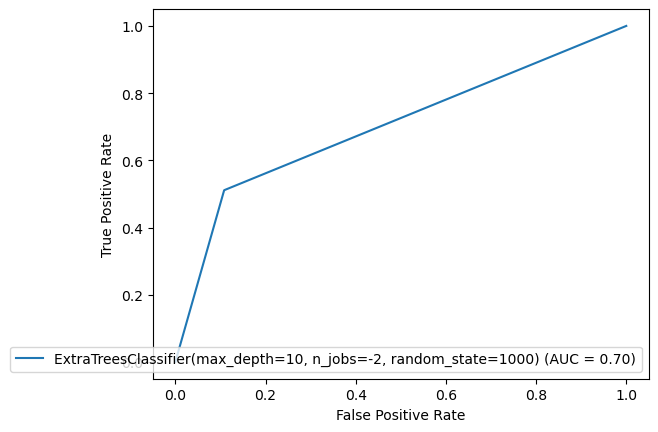

In [144]:
#Plotting ROC and AUC for all the models used
from sklearn import metrics
fpr,tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name= Final_model)
display.plot()
